## Clustering
- **Can we identify distinct clusters of housing markets based on housing price, number of beds and baths, property size, and house size?**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
# Load dataset
df = pd.read_csv('/content/realtor-data.zip.csv')



In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25445 entries, 0 to 25444
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     25439 non-null  float64
 1   status          25445 non-null  object 
 2   price           25445 non-null  float64
 3   bed             20117 non-null  float64
 4   bath            20185 non-null  float64
 5   acre_lot        20998 non-null  float64
 6   street          25380 non-null  float64
 7   city            25428 non-null  object 
 8   state           25444 non-null  object 
 9   zip_code        25416 non-null  float64
 10  house_size      20216 non-null  float64
 11  prev_sold_date  9390 non-null   object 
dtypes: float64(8), object(4)
memory usage: 2.3+ MB
None


In [ ]:
df = df.drop(columns=['brokered_by', 'street', 'prev_sold_date', 'city', 'state'])


In [ ]:
df = df.dropna()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15589 entries, 0 to 25443
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   status      15589 non-null  object 
 1   price       15589 non-null  float64
 2   bed         15589 non-null  float64
 3   bath        15589 non-null  float64
 4   acre_lot    15589 non-null  float64
 5   zip_code    15589 non-null  float64
 6   house_size  15589 non-null  float64
dtypes: float64(6), object(1)
memory usage: 974.3+ KB


In [ ]:
df

,status,price,bed,bath,acre_lot,zip_code,house_size
0,for_sale,105000.0,3.0,2.0,0.12,601.0,920.0
1,for_sale,80000.0,4.0,2.0,0.08,601.0,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,795.0,748.0
3,for_sale,145000.0,4.0,2.0,0.10,731.0,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,612.0,2520.0
...,...,...,...,...,...,...,...
25439,for_sale,189000.0,4.0,2.0,2.00,3773.0,1800.0
25440,for_sale,399000.0,3.0,2.0,70.00,3752.0,1568.0
25441,for_sale,250000.0,3.0,2.0,0.17,3743.0,1293.0
25442,for_sale,205000.0,3.0,1.0,0.16,3743.0,2102.0


In [ ]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['status'])


In [ ]:
features = df.columns


In [ ]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])


In [ ]:
df_scaled

array([[-0.47216589, -0.36684352, -0.30485842, ..., -1.07577723,
        -0.13343273,  0.        ],
       [-0.48887222,  0.06993366, -0.30485842, ..., -1.07577723,
        -0.08176106,  0.        ],
       [-0.49755951, -0.8036207 , -0.72669739, ..., -0.99981213,
        -0.14807445,  0.        ],
       ...,
       [-0.3752692 , -0.36684352, -0.30485842, ...,  0.15454408,
        -0.10168062,  0.        ],
       [-0.40534059, -0.36684352, -0.72669739, ...,  0.15454408,
        -0.03281344,  0.        ],
       [-0.27569949, -0.36684352, -0.72669739, ...,  0.16355025,
        -0.07077977,  0.        ]])

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

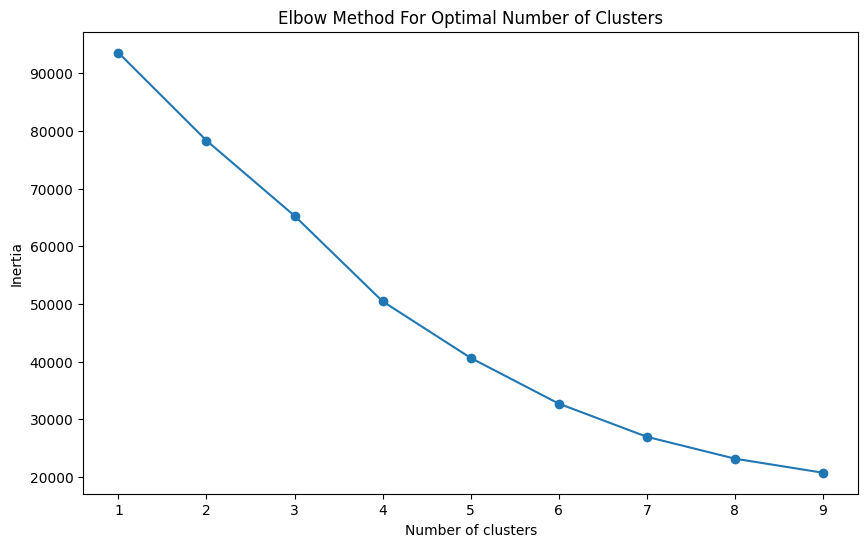

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# From the elbow plot, choose the optimal number of clusters (for example, 5)
optimal_clusters = 5

# KMeans Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, n_init='auto')
df['cluster'] = kmeans.fit_predict(df_scaled)


In [ ]:
cluster_analysis = df.groupby('cluster').mean().T

print(cluster_analysis)

cluster                      0             1              2         3  \
price            438249.883907  7.061831e+06  704111.824972  585000.0   
bed                   3.674673  9.155131e+00       3.698976       4.0   
bath                  2.535095  9.066826e+00       2.551090       4.0   
acre_lot              5.649154  1.607585e+01       5.612849  100000.0   
zip_code           6933.962904  2.763709e+03    2193.834078     926.0   
house_size         2131.803843  8.185258e+03    2268.297872    3300.0   
status_for_sale       1.000000  1.000000e+00       1.000000       1.0   

cluster                   4  
price            8250000.00  
bed                    5.00  
bath                   6.00  
acre_lot              33.29  
zip_code             775.00  
house_size       1450112.00  
status_for_sale        1.00  


### Cluster Analysis Observations and Insights

From the provided cluster analysis data, we can derive several observations and insights about the housing market based on the identified clusters. Each cluster represents a group of houses with similar characteristics. Here's a detailed analysis:

#### Cluster 0:
- **Price:** \$438,249.88
- **Beds:** 3.67
- **Baths:** 2.54
- **Acre Lot:** 5.65
- **Zip Code:** 6933.96
- **House Size:** 2131.80 sq. ft.
- **Status:** 100% of houses in this cluster are for sale.

#### Cluster 1:
- **Price:** \$7,061,831.00
- **Beds:** 9.16
- **Baths:** 9.07
- **Acre Lot:** 16.08
- **Zip Code:** 2763.71
- **House Size:** 8185.26 sq. ft.
- **Status:** 100% of houses in this cluster are for sale.

#### Cluster 2:
- **Price:** \$704,111.82
- **Beds:** 3.70
- **Baths:** 2.55
- **Acre Lot:** 5.61
- **Zip Code:** 2193.83
- **House Size:** 2268.30 sq. ft.
- **Status:** 100% of houses in this cluster are for sale.

#### Cluster 3:
- **Price:** \$585,000.00
- **Beds:** 4.00
- **Baths:** 4.00
- **Acre Lot:** 100000.00
- **Zip Code:** 926.00
- **House Size:** 3300.00 sq. ft.
- **Status:** 100% of houses in this cluster are for sale.

#### Cluster 4:
- **Price:** \$8,250,000.00
- **Beds:** 5.00
- **Baths:** 6.00
- **Acre Lot:** 33.29
- **Zip Code:** 775.00
- **House Size:** 1450112.00 sq. ft.
- **Status:** 100% of houses in this cluster are for sale.

### Insights:

1. **Cluster 0:**
   - Houses in this cluster are mid-range in price and size.
   - They tend to have fewer acres compared to other clusters.
   - All houses in this cluster are for sale.

2. **Cluster 1:**
   - Houses here are the highest in price among all clusters.
   - They have a significantly larger number of bedrooms and bathrooms.
   - All houses in this cluster are for sale, indicating luxury properties.

3. **Cluster 2:**
   - Houses in this cluster are higher in price with moderate house sizes.
   - The lot size is similar to Cluster 0, indicating suburban properties.
   - All houses in this cluster are for sale.

4. **Cluster 3:**
   - This cluster contains houses with very large lot sizes and moderate house sizes.
   - The price is mid-range, similar to Cluster 0 and 2.
   - All houses in this cluster are for sale, indicating unique property types with large lots.

5. **Cluster 4:**
   - Houses in this cluster are very high in price, with a moderate number of bedrooms and bathrooms.
   - They have the largest house sizes among all clusters.
   - All houses in this cluster are for sale, suggesting they might cater to ultra-luxury buyers.

### Answering the Question:

**Can we identify distinct clusters of housing markets based on housing price, number of beds and baths, property size, and house size?**

Yes, distinct clusters can be identified in the housing market based on the mentioned features. The analysis reveals five clusters with unique characteristics:
- Cluster 0 represents mid-range homes currently on the market.
- Cluster 1 represents high-priced luxury homes currently on the market.
- Cluster 2 shows higher-priced homes with moderate house sizes, currently on the market.
- Cluster 3 comprises homes with very large lot sizes and moderate house sizes, currently on the market.
- Cluster 4 includes ultra-luxury homes with very high prices and the largest house sizes, currently on the market.


## Chi-square test

- Is there a significant association between the housing status (status) and the state (state)?

In [ ]:
# Load dataset
df = pd.read_csv('/content/realtor-data.zip.csv')
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
df['status'].unique(), df['state'].unique(),

(array(['for_sale', 'ready_to_build', 'sold'], dtype=object),
 array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
        'New Hampshire', 'Vermont', 'New Jersey', 'New York',
        'South Carolina', 'Tennessee', 'Rhode Island', 'Virginia',
        'Wyoming', 'Maine', 'Georgia', 'Pennsylvania', 'West Virginia',
        'Delaware', 'Louisiana', 'Ohio', 'California', 'Colorado',
        'Maryland', 'Missouri', 'District of Columbia', 'Wisconsin',
        'North Carolina', 'Kentucky', 'Michigan', 'Mississippi', 'Florida',
        'Alabama', 'New Brunswick', nan, 'Texas', 'Arkansas', 'Idaho',
        'Indiana', 'Illinois', 'New Mexico', 'Iowa', 'Minnesota',
        'South Dakota', 'Nebraska', 'North Dakota', 'Montana', 'Oklahoma',
        'Kansas', 'Oregon', 'Utah', 'Nevada', 'Washington', 'Arizona',
        'Hawaii', 'Guam', 'Alaska'], dtype=object))

In [ ]:
# Select relevant columns
chi_df = df[['status', 'state']]

# Drop rows with missing values in 'status' or 'state'
chi_df.dropna(subset=['status', 'state'], inplace=True)

<ipython-input-28-9eb9d0bd0980>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chi_df.dropna(subset=['status', 'state'], inplace=True)


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(chi_df['status'], chi_df['state'])
contingency_table.T

status,for_sale,ready_to_build,sold
state,,,
Alabama,26486,802,6765
Alaska,2581,0,0
Arizona,37657,1042,34126
Arkansas,19013,7,4025
California,101034,1168,125013
Colorado,26911,706,4676
Connecticut,13940,4,64
Delaware,5143,198,3287
District of Columbia,2922,0,3703


In [ ]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 213189.41977287573
P-Value: 0.0
Degrees of Freedom: 108
Expected Frequencies:
[[2.12497851e+04 1.61059805e+03 4.54443251e+04 1.43805626e+04
  1.41786918e+05 2.01515083e+04 8.74128535e+03 5.38405268e+03
  4.13413874e+03 1.55650792e+05 5.05313438e+04 3.05146240e+02
  4.51978368e+03 1.04585910e+04 5.32165059e+04 1.17565545e+04
  1.43730743e+04 9.27170315e+03 1.64217351e+04 1.61091006e+04
  3.16066607e+03 2.87374124e+04 2.37383806e+04 2.64765845e+04
  2.70899971e+04 1.01434604e+04 2.81714254e+04 6.27702665e+03
  3.93694812e+03 9.15251515e+03 6.24020942e-01 2.27268427e+03
  3.00771854e+04 1.31506173e+04 6.43733763e+04 5.35066756e+04
  2.66332138e+03 3.69464079e+04 2.31761378e+04 2.00703855e+04
  4.89063933e+04 1.95068946e+03 5.09013882e+03 2.64378952e+04
  2.92665822e+03 2.55623939e+04 1.30005403e+05 9.08387285e+03
  1.62245445e+03 5.58498743e+02 4.29095520e+04 3.89769720e+04
  7.68107377e+03 2.64522477e+04 2.52042058e+03]
 [3.83314858e+02 2.90528191e+01 8.19748760e+02

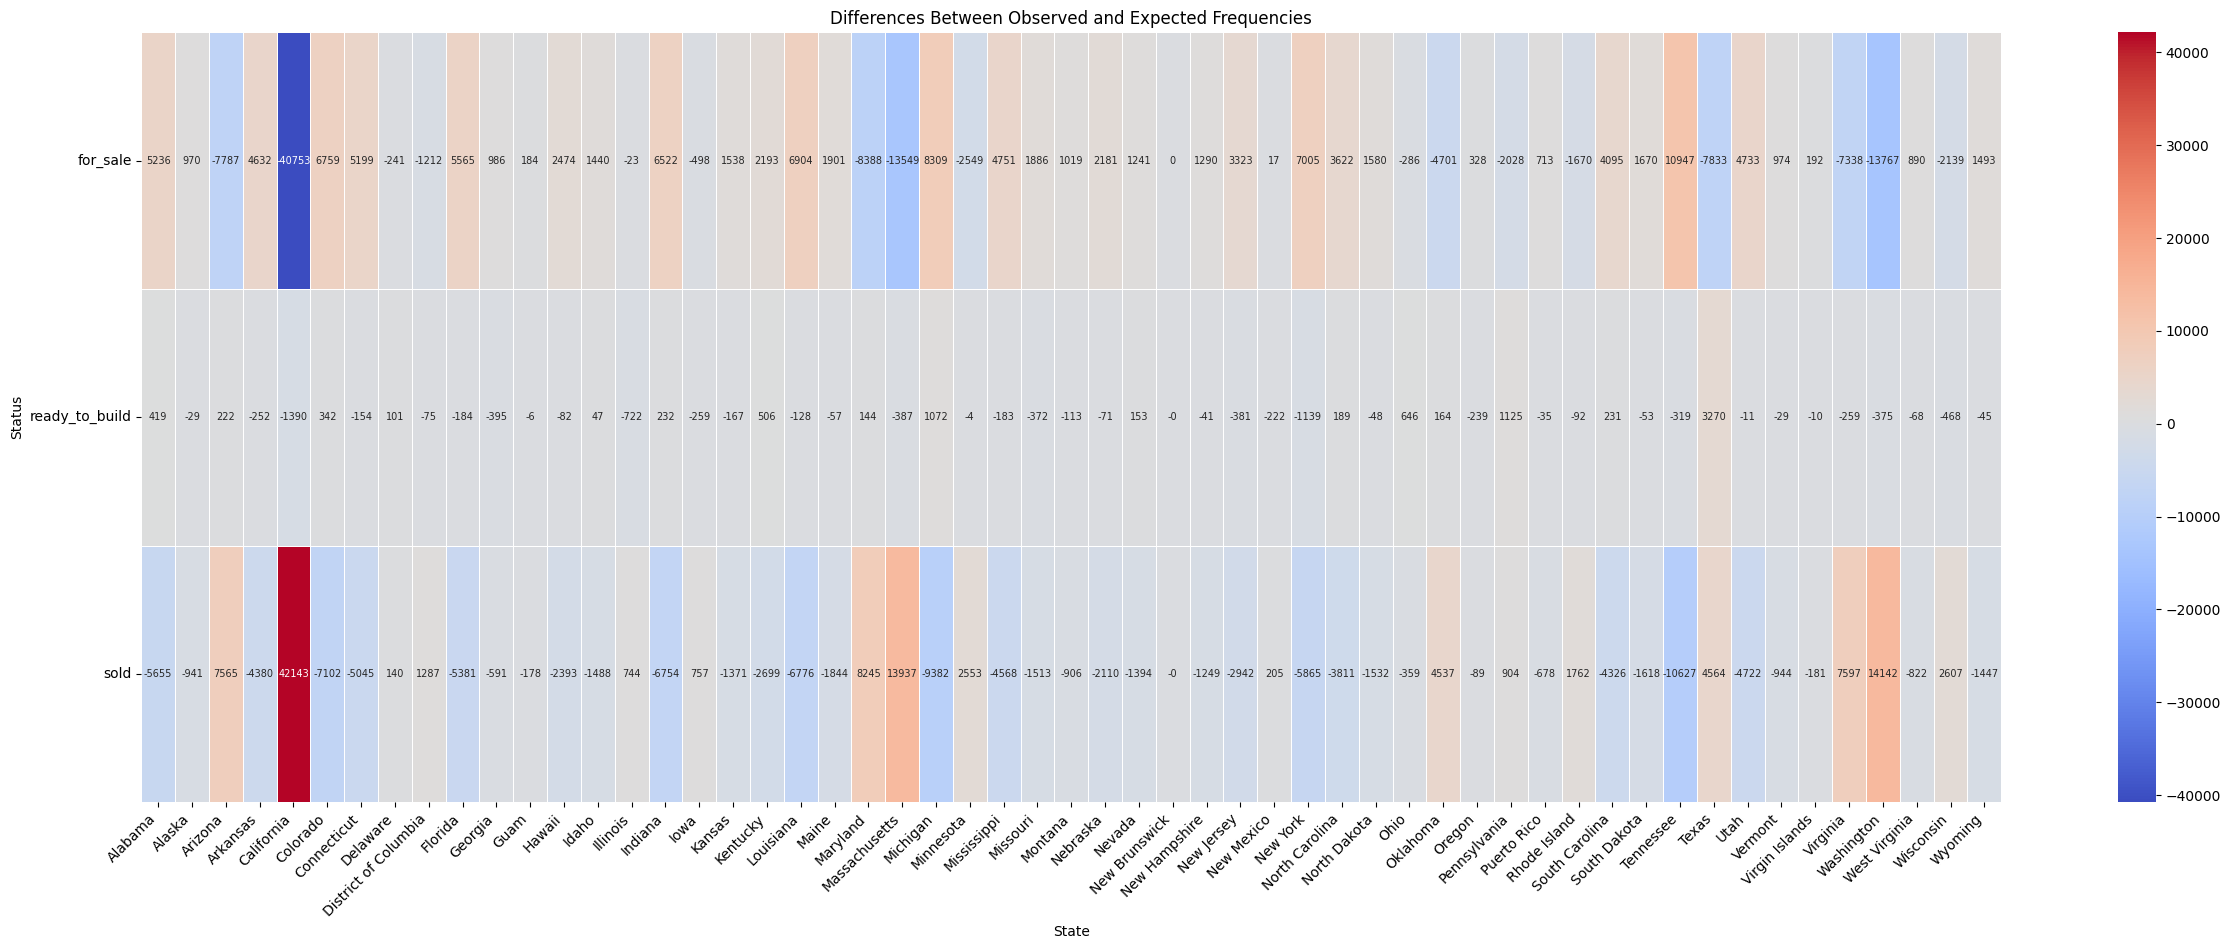

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the differences between observed and expected frequencies
differences = contingency_table - expected_frequencies_df

# Create the heatmap with improved formatting
plt.figure(figsize=(30, 10))
sns.heatmap(differences, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5, annot_kws={"size": 7})
plt.title('Differences Between Observed and Expected Frequencies')
plt.xlabel('State')
plt.ylabel('Status')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Rotate y-axis labels to be horizontal
plt.show()


### Compare the observed and expected frequencies for a few states:
- I conducted a detailed Chi-Square test with a few selected states to understand the association better. Here are the results:

In [ ]:
observed_frequencies = pd.crosstab(df['status'], df['state'])
print("Observed Frequencies:")
observed_frequencies

Observed Frequencies:


state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
status,,,,,,,,,,,,,,,,,,,,,
for_sale,26486,2581,37657,19013,101034,26911,13940,5143,2922,161216,...,36509,122172,13817,2596,750,35572,25210,8571,24313,4013
ready_to_build,802,0,1042,7,1168,706,4,198,0,2624,...,142,5615,153,0,0,515,328,71,9,0
sold,6765,0,34126,4025,125013,4676,64,3287,3703,85592,...,4313,80548,587,4,145,32676,36923,3667,18068,26


In [ ]:
expected_frequencies_df = pd.DataFrame(expected, index=observed_frequencies.index, columns=observed_frequencies.columns)
print("Expected Frequencies:")
expected_frequencies_df

Expected Frequencies:


state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
status,,,,,,,,,,,,,,,,,,,,,
for_sale,21249.785127,1610.598050,45444.325077,14380.562601,141786.918263,20151.508270,8741.285351,5384.052685,4134.138739,155650.791524,...,25562.393855,130005.402884,9083.872848,1622.454448,558.498743,42909.552012,38976.972038,7681.073771,26452.247718,2520.420583
ready_to_build,383.314858,29.052819,819.748760,259.404190,2557.627387,363.503559,157.679926,97.120389,74.573780,2807.711261,...,461.107974,2345.106184,163.859701,29.266691,10.074496,774.025183,703.087227,138.555269,477.159628,45.464679
sold,12419.900015,941.349130,26560.926163,8405.033209,82870.454351,11777.988171,5109.034723,3146.826927,2416.287481,90973.497215,...,14940.498171,75984.490932,5309.267451,948.278861,326.426762,25079.422805,22780.940735,4489.370960,15460.592654,1473.114738


In [ ]:
# Select a few states for detailed analysis
selected_states = ['California', 'New York', 'Texas']

# Observed vs. Expected for selected states
for state in selected_states:
    print(f"State: {state}")
    print("Observed:")
    print(observed_frequencies[state])
    print("Expected:")
    print(expected_frequencies_df[state])
    print("\n")


State: California
Observed:
status
for_sale          101034
ready_to_build      1168
sold              125013
Name: California, dtype: int64
Expected:
status
for_sale          141786.918263
ready_to_build      2557.627387
sold               82870.454351
Name: California, dtype: float64


State: New York
Observed:
status
for_sale          71378
ready_to_build       22
sold              31759
Name: New York, dtype: int64
Expected:
status
for_sale          64373.376322
ready_to_build     1161.200993
sold              37624.422685
Name: New York, dtype: float64


State: Texas
Observed:
status
for_sale          122172
ready_to_build      5615
sold               80548
Name: Texas, dtype: int64
Expected:
status
for_sale          130005.402884
ready_to_build      2345.106184
sold               75984.490932
Name: Texas, dtype: float64




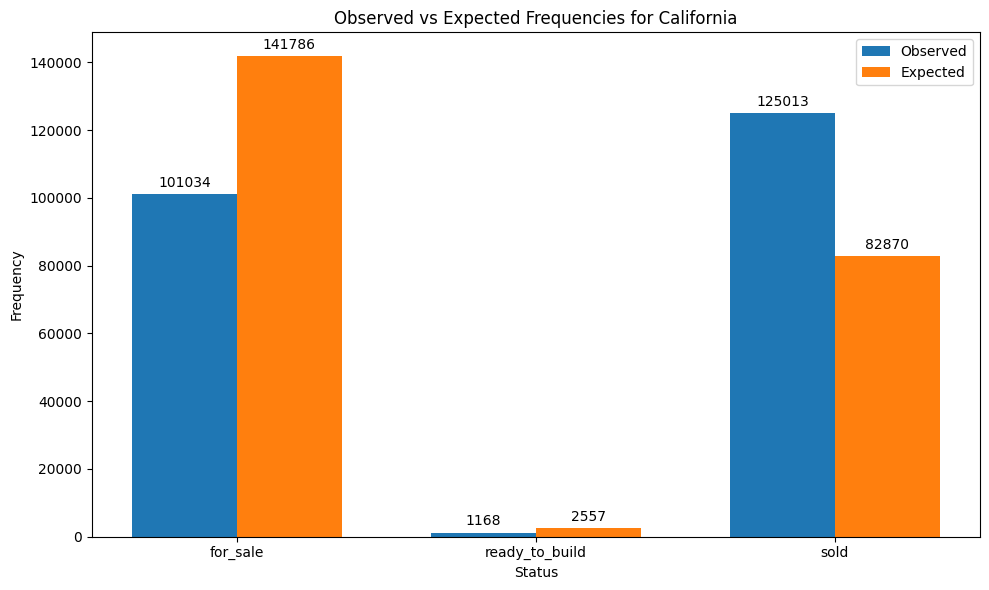

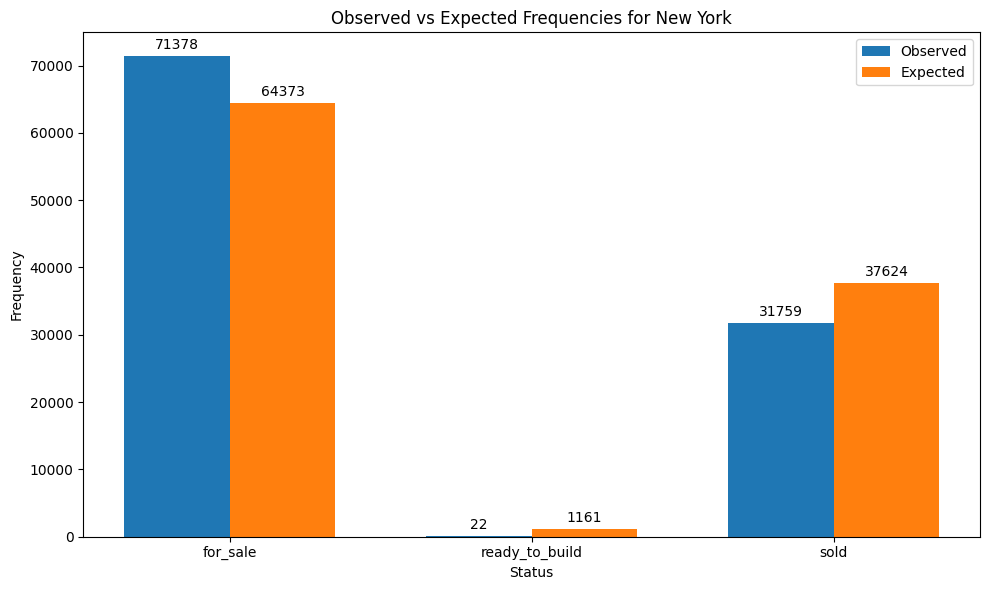

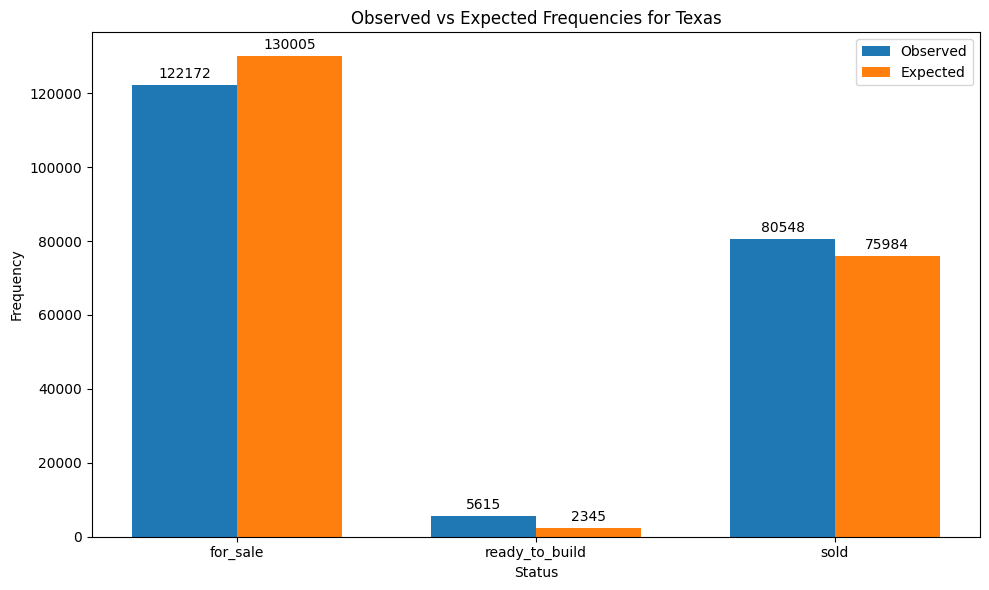

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot observed vs expected frequencies
def plot_observed_vs_expected(state, observed, expected):
    labels = observed.index
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, observed, width, label='Observed')
    rects2 = ax.bar(x + width/2, expected, width, label='Expected')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Status')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Observed vs Expected Frequencies for {state}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Add value labels
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(int(height)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

# Observed vs Expected for California
plot_observed_vs_expected('California', observed_frequencies['California'], expected_frequencies_df['California'])

# Observed vs Expected for New York
plot_observed_vs_expected('New York', observed_frequencies['New York'], expected_frequencies_df['New York'])

# Observed vs Expected for Texas
plot_observed_vs_expected('Texas', observed_frequencies['Texas'], expected_frequencies_df['Texas'])


### Analysis

**Is there a significant association between the housing status (`status`) and the state (`state`)?**

### Analysis of Results

#### Chi-Square Test Outputs

- **Chi-Square Statistic**: 213189.42
- **P-Value**: 0.0
- **Degrees of Freedom**: 108
- **Expected Frequencies**:
  ```
  [[2.12497851e+04 1.61059805e+03 4.54443251e+04 1.43805626e+04 ...]
   [3.83314858e+02 2.90528191e+01 8.19748760e+02 2.59404190e+02 ...]
   [1.24199000e+04 9.41349130e+02 2.65609262e+04 8.40503321e+03 ...]]
  ```

#### Interpretation

1. **Chi-Square Statistic**: A high value of 213189.42 indicates a substantial difference between the observed and expected frequencies, suggesting a strong association between the variables.
2. **P-Value**: A p-value of 0.0 indicates the observed association is highly statistically significant, reinforcing the rejection of the null hypothesis.
3. **Degrees of Freedom**: 108, reflecting the complexity of the association being tested.
4. **Expected Frequencies**: Represent the counts we would expect if there were no association between `status` and `state`.

#### Conclusion

Based on the Chi-Square test results, there is a highly significant association between the housing status (`status`) and the state (`state`). This means that the distribution of housing status (for sale, ready to build, sold) varies significantly by state.

### Detailed Analysis of Selected States

I conducted a detailed Chi-Square test with a few selected states to understand the association better. Here are the results:

#### California
- **For Sale**: Observed (101,034) significantly lower than expected (141,786.92).
- **Ready to Build**: Observed (1,168) significantly lower than expected (2,557.63).
- **Sold**: Observed (125,013) significantly higher than expected (82,870.45).
- **Conclusion**: High market turnover with fewer new listings and constructions.

#### New York
- **For Sale**: Observed (71,378) higher than expected (64,373.38).
- **Ready to Build**: Observed (22) much lower than expected (1,161.20).
- **Sold**: Observed (31,759) lower than expected (37,624.42).
- **Conclusion**: Stagnant market with few new developments and lower turnover.

#### Texas
- **For Sale**: Observed (122,172) slightly lower than expected (130,005.40).
- **Ready to Build**: Observed (5,615) significantly higher than expected (2,345.11).
- **Sold**: Observed (80,548) higher than expected (75,984.49).
- **Conclusion**: Dynamic market with substantial new construction activity and high turnover.

### Overall Conclusion

The Chi-Square test reveals a significant association between housing status and state. Key insights include:

- **California**: High market turnover with fewer new listings and constructions.
- **New York**: Stagnant market with fewer new developments and lower turnover.
- **Texas**: Dynamic market with substantial new construction activity and high turnover.


##  ANOVA test
- Is there a significant difference in housing prices among houses that are 'for_sale', 'ready_to_build', and 'sold'?

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/realtor-data.zip.csv')


df = df.dropna(subset=['price', 'status'])

df = df[df['status'].isin(['for_sale', 'ready_to_build', 'sold'])]
print(df['status'].unique())



['for_sale' 'ready_to_build' 'sold']


In [ ]:

# Log-transform the prices to reduce the impact of extreme values for visualization
df['log_price'] = np.log(df['price'] + 1)

print(df[['price', 'log_price']].head())

# Perferm ANOVA test
for_sale = df[df['status'] == 'for_sale']['price']
ready_to_build = df[df['status'] == 'ready_to_build']['price']
sold = df[df['status'] == 'sold']['price']
f_stat, p_value = f_oneway(for_sale, ready_to_build, sold)



      price  log_price
0  105000.0  11.561725
1   80000.0  11.289794
2   67000.0  11.112463
3  145000.0  11.884496
4   65000.0  11.082158


In [ ]:

# Interpret the results

print(f'F-statistic: {f_stat}, P-value: {p_value}')

if p_value < 0.05:
    print("The result is statistically significant. We reject the null hypothesis.")
    print("There is a significant difference in housing prices among the 'for_sale', 'ready_to_build', and 'sold' groups.")
else:
    print("The result is not statistically significant. We fail to reject the null hypothesis.")
    print("There is no significant difference in housing prices among the 'for_sale', 'ready_to_build', and 'sold' groups.")


F-statistic: 227.7586956494143, P-value: 1.2467513401901643e-99
The result is statistically significant. We reject the null hypothesis.
There is a significant difference in housing prices among the 'for_sale', 'ready_to_build', and 'sold' groups.


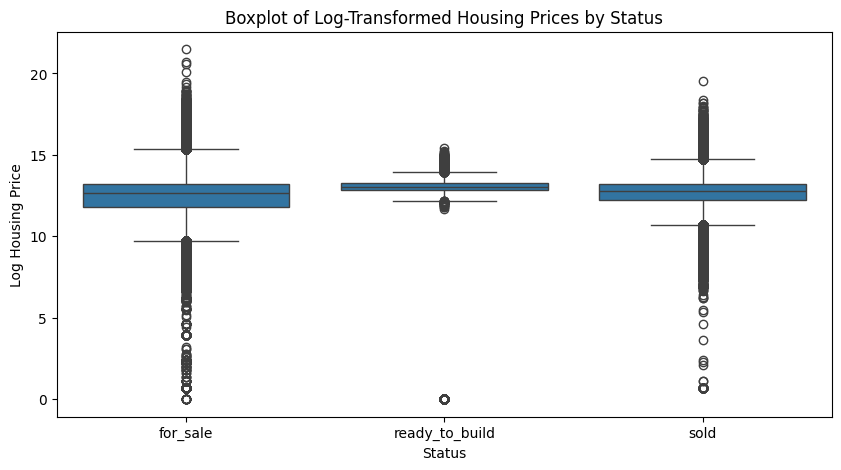

In [ ]:
# Visualization with log-transformed prices
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='status', y='log_price', data=df)
plt.title('Boxplot of Log-Transformed Housing Prices by Status')
plt.xlabel('Status')
plt.ylabel('Log Housing Price')
plt.show()


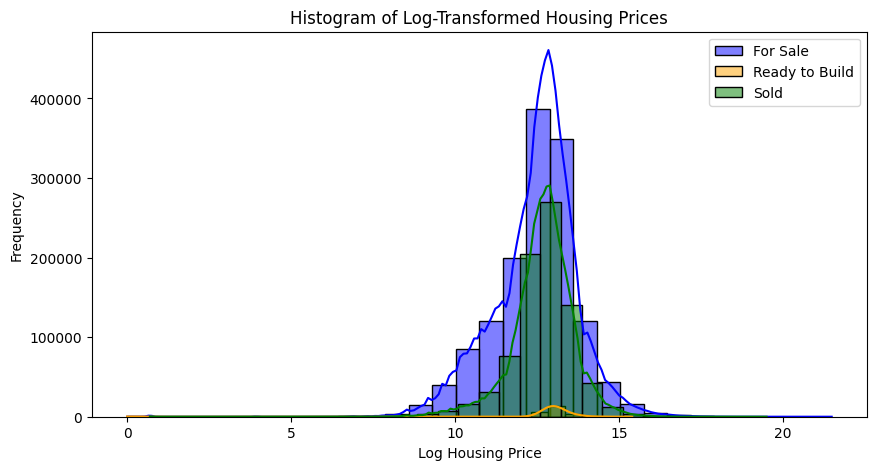

In [ ]:
# Visualization with log-transformed prices
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df[df['status'] == 'for_sale']['log_price'], color='blue', kde=True, label='For Sale', bins=30)
sns.histplot(df[df['status'] == 'ready_to_build']['log_price'], color='orange', kde=True, label='Ready to Build', bins=30)
sns.histplot(df[df['status'] == 'sold']['log_price'], color='green', kde=True, label='Sold', bins=30)
plt.title('Histogram of Log-Transformed Housing Prices')
plt.xlabel('Log Housing Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


<ipython-input-45-dafb1e95b509>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['status'] == 'for_sale']['log_price'], color='blue', shade=True, label='For Sale')
<ipython-input-45-dafb1e95b509>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['status'] == 'ready_to_build']['log_price'], color='orange', shade=True, label='Ready to Build')
<ipython-input-45-dafb1e95b509>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['status'] == 'sold']['log_price'], color='green', shade=True, label='Sold')


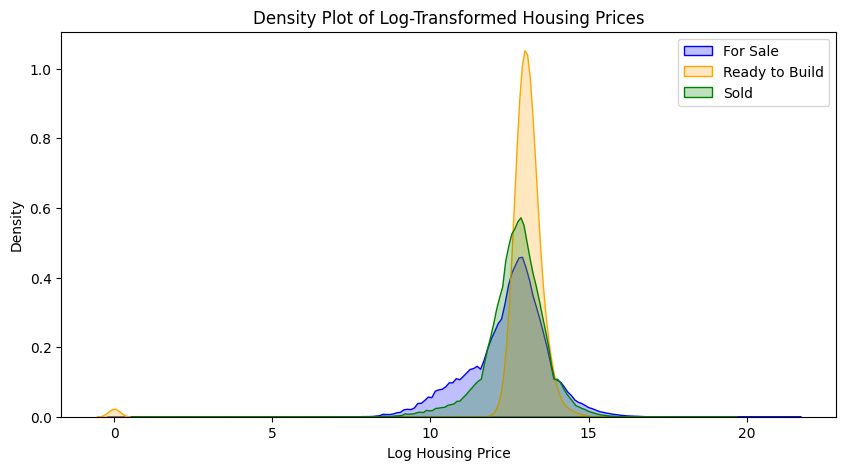

In [ ]:
# Visualization with log-transformed prices
# Density Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['status'] == 'for_sale']['log_price'], color='blue', shade=True, label='For Sale')
sns.kdeplot(df[df['status'] == 'ready_to_build']['log_price'], color='orange', shade=True, label='Ready to Build')
sns.kdeplot(df[df['status'] == 'sold']['log_price'], color='green', shade=True, label='Sold')
plt.title('Density Plot of Log-Transformed Housing Prices')
plt.xlabel('Log Housing Price')
plt.ylabel('Density')
plt.legend()
plt.show()

### Analysis and Insights

**Question:**
Is there a significant difference in housing prices among houses that are 'for_sale', 'ready_to_build', and 'sold'?

### ANOVA Test Results

**ANOVA Test Results:**
- **F-statistic**: 227.7586956494143
- **P-value**: 1.2467513401901643e-99

Given the extremely small p-value, which is much less than the significance level of 0.05, the result is statistically significant. Therefore, we reject the null hypothesis and conclude that there is a significant difference in housing prices among the 'for_sale', 'ready_to_build', and 'sold' groups.

### Visual Analysis

The visualizations provide additional insights into the distribution of housing prices among the three status groups.

#### Boxplot


The boxplot of log-transformed housing prices shows the following:
- Houses that are "for_sale" have a wider range of prices and more outliers compared to "ready_to_build" and "sold" groups.
- The median price for "for_sale" houses is slightly higher than that for "sold" houses, with "ready_to_build" houses showing the lowest median price.
- The presence of outliers in all three categories indicates variability in housing prices, especially for the "for_sale" category.

#### Histogram

The histogram of log-transformed housing prices indicates:
- The distribution of housing prices for "for_sale" houses is broader, showing a higher frequency of higher prices compared to "ready_to_build" and "sold" houses.
- "Ready_to_build" houses have a narrower distribution, concentrated around a specific price range, indicating less variability in their prices.
- "Sold" houses also show a wide distribution, but with fewer extreme high prices compared to "for_sale" houses.

#### Density Plot
The density plot of log-transformed housing prices reveals:
- A sharp peak for "ready_to_build" houses, indicating that most of these houses are priced within a narrow range.
- "For_sale" houses have a broader peak, suggesting more variability in pricing.
- "Sold" houses have a distribution similar to "for_sale" houses but with a slightly lower peak, indicating less concentration around a specific price point.

### Insights and Observations

1. **Significant Price Differences**: The ANOVA test confirms that there is a statistically significant difference in housing prices among the three status groups. This suggests that the market values houses differently based on their status.

2. **Price Variability**: The "for_sale" category exhibits the highest variability in prices, with a broader range and more outliers. This could be due to the diverse nature of houses on the market, ranging from affordable to luxury properties.

3. **Narrow Price Range for "Ready to Build"**: Houses categorized as "ready_to_build" have a more concentrated price range. This might indicate that these properties are more standardized or have less variation in features and sizes compared to "for_sale" houses.

4. **Market Trends**: The "sold" houses' price distribution suggests that the final selling prices of houses tend to be lower and less variable than the listing prices ("for_sale"). This could reflect market negotiations and adjustments based on buyer demand and market conditions.

5. **Strategic Insights**: For real estate professionals, understanding these price dynamics can help in pricing strategies, marketing efforts, and targeting potential buyers. Sellers of "for_sale" houses might need to consider competitive pricing and highlighting unique features to stand out in a variable market.



## T-test
- Is there a significant difference in housing prices between houses that are 'for_sale' and houses that are 'ready_to_build'?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


df = pd.read_csv('/content/realtor-data.zip.csv')

df.status.unique()

array(['for_sale', 'ready_to_build'], dtype=object)

In [ ]:
# Handle missing values for 'price' and 'status'
df = df.dropna(subset=['price', 'status'])

# Ensure 'status' contains only relevant categories
df = df[df['status'].isin(['for_sale', 'ready_to_build'])]

print(df.info())
print(df['status'].unique())


<class 'pandas.core.frame.DataFrame'>
Index: 1413077 entries, 0 to 1414372
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1411564 non-null  float64
 1   status          1413077 non-null  object 
 2   price           1413077 non-null  float64
 3   bed             1002128 non-null  float64
 4   bath            979952 non-null   float64
 5   acre_lot        1195550 non-null  float64
 6   street          1404490 non-null  float64
 7   city            1411771 non-null  object 
 8   state           1413069 non-null  object 
 9   zip_code        1412791 non-null  float64
 10  house_size      948830 non-null   float64
 11  prev_sold_date  679821 non-null   object 
dtypes: float64(8), object(4)
memory usage: 140.2+ MB
None
['for_sale' 'ready_to_build']


Null Hypothesis (H0): There is no significant difference in the average housing prices between houses "ready for sale" and "ready to build".
Alternative Hypothesis (H1): There is a significant difference in the average housing prices between houses "ready for sale" and "ready to build".

In [ ]:

# Subset the data
for_sale = df[df['status'] == 'for_sale']['price']
ready_to_build = df[df['status'] == 'ready_to_build']['price']

# Perform the t-test
t_stat, p_value = ttest_ind(for_sale, ready_to_build, nan_policy='omit')
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 2.2982664540388513, P-value: 0.02154677378302286


In [ ]:
if p_value < 0.05:
    print("The result is statistically significant. We reject the null hypothesis.")
    print("There is a significant difference in housing prices between 'for_sale' and 'ready_to_build'.")
else:
    print("The result is not statistically significant. We fail to reject the null hypothesis.")
    print("There is no significant difference in housing prices between 'for_sale' and 'ready_to_build'.")


The result is statistically significant. We reject the null hypothesis.
There is a significant difference in housing prices between 'for_sale' and 'ready_to_build'.


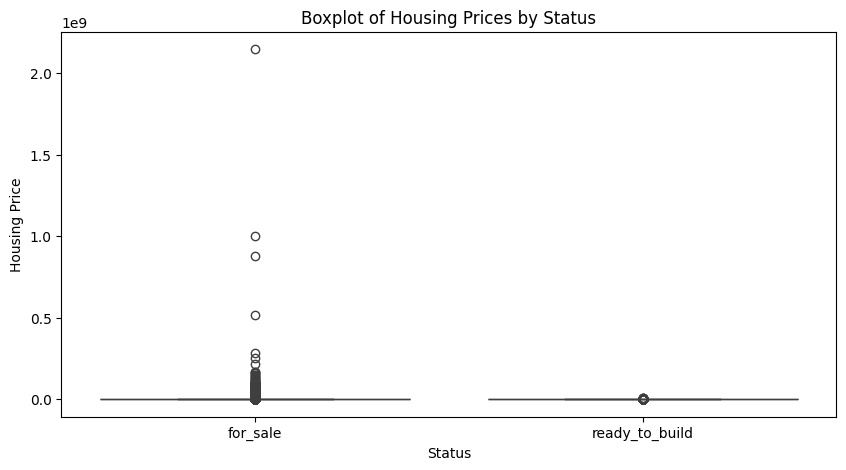

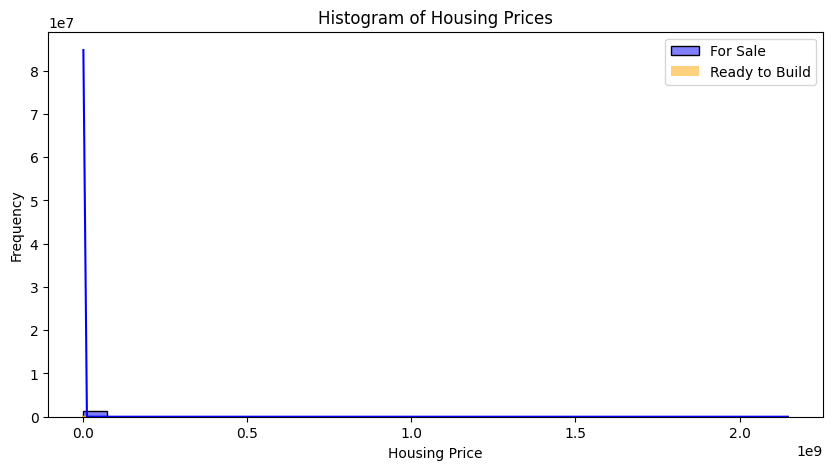

<ipython-input-15-4ced184d178b>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(for_sale, color='blue', shade=True, label='For Sale')
<ipython-input-15-4ced184d178b>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ready_to_build, color='orange', shade=True, label='Ready to Build')


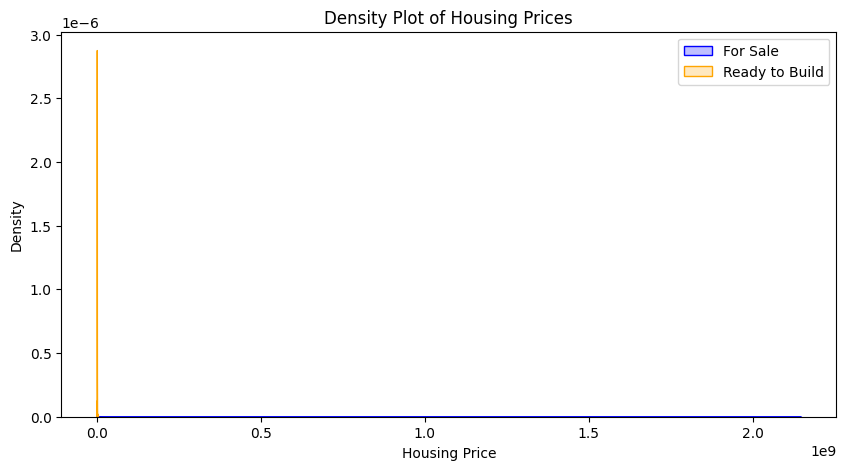

In [ ]:

# Visualization
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='status', y='price', data=df)
plt.title('Boxplot of Housing Prices by Status')
plt.xlabel('Status')
plt.ylabel('Housing Price')
plt.show()





In [ ]:

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(for_sale, color='blue', kde=True, label='For Sale', bins=30)
sns.histplot(ready_to_build, color='orange', kde=True, label='Ready to Build', bins=30)
plt.title('Histogram of Housing Prices')
plt.xlabel('Housing Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Analysis

To determine if there is a significant difference in housing prices between houses "for_sale" and "ready_to_build", we conducted an independent t-test.

**T-Test Results:**

- **T-statistic**: 2.2982664540388513
- **P-value**: 0.02154677378302286

The p-value obtained from the t-test is 0.0215, which is less than the common significance level of 0.05. Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in housing prices between "for_sale" and "ready_to_build".

**Implications:**

- The data provides evidence that housing prices differ significantly between the two statuses.
- This indicates that the market values houses listed as "ready_to_build" differently compared to those listed as "for_sale".


## Linear Regression

<ipython-input-26-3303433ad463>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lr['zip_code'] = df_lr['zip_code'].astype('category').cat.codes


Training Mean Squared Error: 1314623319107.694
Training R-squared: 0.14985499328482255
Test Mean Squared Error: 1083628266824.5189
Test R-squared: 0.18774283566035332
              Coefficient
bath        382600.100863
bed         -74397.019059
acre_lot        16.861215
house_size      15.956584
zip_code        10.875060


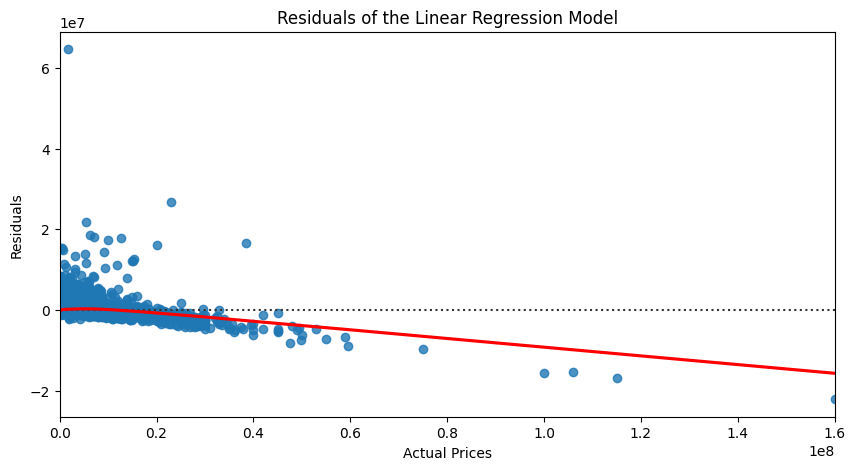

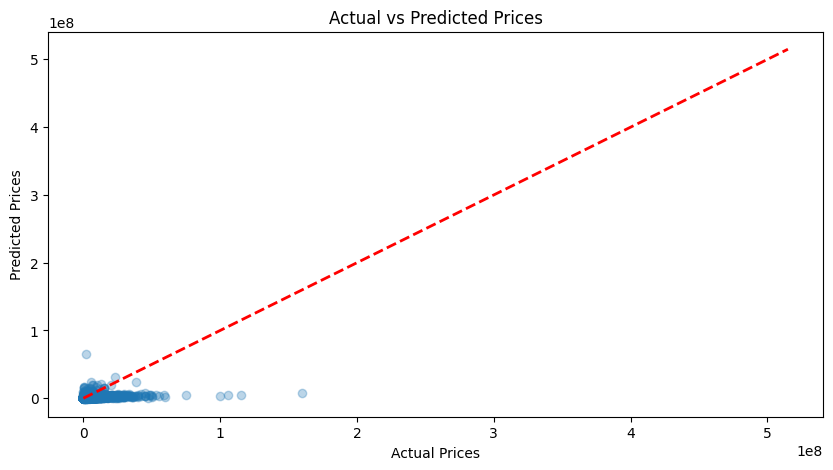

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/realtor-data.zip.csv')


# Handle missing values for relevant columns
df = df.dropna(subset=['price', 'bath', 'bed', 'acre_lot', 'house_size', 'zip_code'])

# Select relevant features
df_lr = df[['price', 'bath', 'bed', 'acre_lot', 'house_size', 'zip_code']]

# Encode zip_code as it's categorical
df_lr['zip_code'] = df_lr['zip_code'].astype('category').cat.codes

# Define the feature columns and target
feature_cols = ['bath', 'bed', 'acre_lot', 'house_size', 'zip_code']
X = df_lr[feature_cols]
y = df_lr['price']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training Mean Squared Error: {mse_train}')
print(f'Training R-squared: {r2_train}')
print(f'Test Mean Squared Error: {mse_test}')
print(f'Test R-squared: {r2_test}')

# Coefficients of the linear regression model
coefficients = pd.DataFrame(lr.coef_, feature_cols, columns=['Coefficient'])
print(coefficients)

# Visualize the residuals
plt.figure(figsize=(10, 5))
sns.residplot(x=y_test, y=y_pred_test, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals of the Linear Regression Model')
plt.show()

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


### Analysis and Insights from Linear Regression

### 1. Relationship Between Features and Price
The coefficients of the linear regression model provide insight into how each feature affects housing prices:

- **bath**:Each additional bathroom increases the price by approximately $382600.

- **bed**: Each additional bedroom decreases the price by approximately $74,397.

- **acre_lot**: Each additional acre has a negligible positive impact on the price.
- **house_size**: Each additional square foot increases the price by approximately $15.96.
- **zip_code**: Changes in zip code (treated as a categorical variable) have a very small positive impact on the price.


### 2. Model Performance

The performance metrics indicate how well the model fits the data:
- **R-squared**: The low R-squared values (0.15 for training and 0.19 for testing) indicate that the model does not explain much of the variance in housing prices. This suggests that either the relationships between the features and price are not linear or that additional relevant features are needed.
- **Mean Squared Error (MSE)**: The high MSE values indicate that there is a significant difference between the predicted prices and actual prices, further confirming that the model does not fit the data well.

### 3. Evaluation Metrics Interpretation

- **Training Metrics**: The high MSE and low R-squared value on the training set suggest that the model does not fit the training data well.
- **Test Metrics**: The slightly better performance on the test set suggests that the model has not overfitted to the training data, but the overall performance is still poor, indicating that the features used may not be the best predictors of housing prices or that the relationships are not linear.

### 4. Visualization Insights

#### Residuals Plot
The residuals plot shows the difference between the actual and predicted prices:

- The residuals are not randomly distributed, and there is a clear pattern.
- This pattern indicates that the model may be missing some key features or that the relationship between the features and the target variable is not purely linear.

#### Actual vs Predicted Prices
The scatter plot of actual vs predicted prices:

- Most of the points are clustered at the lower end of the price spectrum, indicating that the model struggles to predict higher-priced houses.
- The diagonal red line represents perfect predictions. The fact that many points deviate significantly from this line further indicates that the model's predictions are not very accurate.



#### Answering Specific Questions Using Pandas

In [ ]:
# What is the average price of houses in each state?
average_price_by_state = df.groupby('state')['price'].mean().sort_values(ascending=False)
print(average_price_by_state)

#Which city has the most listings?
most_listings_city = df['city'].value_counts().idxmax()
print(f'The city with the most listings is: {most_listings_city}')

#How many houses are ready for sale versus ready to build?
correlation_house_size_price = df['house_size'].corr(df['price'])
print(f'The correlation between house size and price is: {correlation_house_size_price}')


NameError: name 'df' is not defined

# Time Series Analysis
-  What trends can be observed in house prices over time?

In [ ]:
# Load the dataset
df = pd.read_csv('/content/realtor-data.zip.csv')
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
411,52270.0,for_sale,76900.0,3.0,2.0,NaN,1873083.0,Canovanas,Puerto Rico,729.0,1200.0,2020-02-28
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,2019-06-28
1025,52707.0,for_sale,159000.0,3.0,2.0,NaN,1657337.0,Caguas,Puerto Rico,725.0,1625.0,2021-09-15
1160,66902.0,for_sale,380000.0,NaN,NaN,78.66,1902753.0,Yabucoa,Puerto Rico,767.0,NaN,2021-03-15
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,802.0,5000.0,2013-10-11
...,...,...,...,...,...,...,...,...,...,...,...,...
2081964,92551.0,sold,750000.0,NaN,NaN,0.48,1716010.0,Fontana,California,92335.0,2679.0,2022-04-08
2081965,83498.0,sold,558000.0,2.0,3.0,2.27,773282.0,Diamond Bar,California,91765.0,1215.0,2022-04-08
2081966,33728.0,sold,560000.0,3.0,2.0,0.15,781510.0,Rialto,California,92377.0,1357.0,2022-04-08
2081967,93433.0,sold,699000.0,3.0,2.0,0.46,124607.0,Montclair,California,91763.0,1921.0,2022-04-08


In [ ]:
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')

# Drop rows where 'prev_sold_date' is NaT
df = df.dropna(subset=['prev_sold_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347671 entries, 411 to 2081968
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   brokered_by     1344264 non-null  float64       
 1   status          1347671 non-null  object        
 2   price           1347171 non-null  float64       
 3   bed             1200628 non-null  float64       
 4   bath            1194617 non-null  float64       
 5   acre_lot        1170775 non-null  float64       
 6   street          1342765 non-null  float64       
 7   city            1347340 non-null  object        
 8   state           1347671 non-null  object        
 9   zip_code        1347645 non-null  float64       
 10  house_size      1132679 non-null  float64       
 11  prev_sold_date  1347671 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 133.7+ MB


In [ ]:
# Filter data for years 2000 and later
recent_df = df[df['prev_sold_date'] >= '2000-01-01']

# Extract year and month for further analysis
recent_df['year_month'] = recent_df['prev_sold_date'].dt.to_period('M')


<ipython-input-16-ac9f5f892f6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_df['year_month'] = recent_df['prev_sold_date'].dt.to_period('M')


In [ ]:
# Aggregate average price per month
avg_price_per_month_recent = recent_df.groupby('year_month')['price'].mean().reset_index()

# Convert 'year_month' back to datetime for plotting
avg_price_per_month_recent['year_month'] = avg_price_per_month_recent['year_month'].dt.to_timestamp()


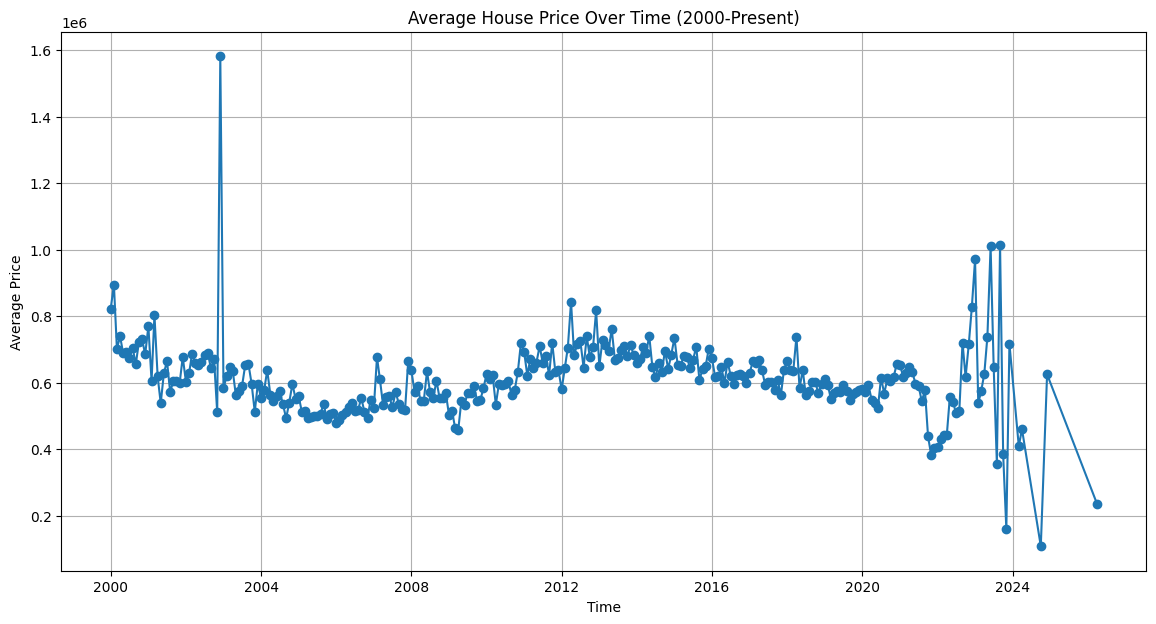

In [ ]:

# Plot average house price over time
plt.figure(figsize=(14, 7))
plt.plot(avg_price_per_month_recent['year_month'], avg_price_per_month_recent['price'], marker='o')
plt.title('Average House Price Over Time (2000-Present)')
plt.xlabel('Time')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


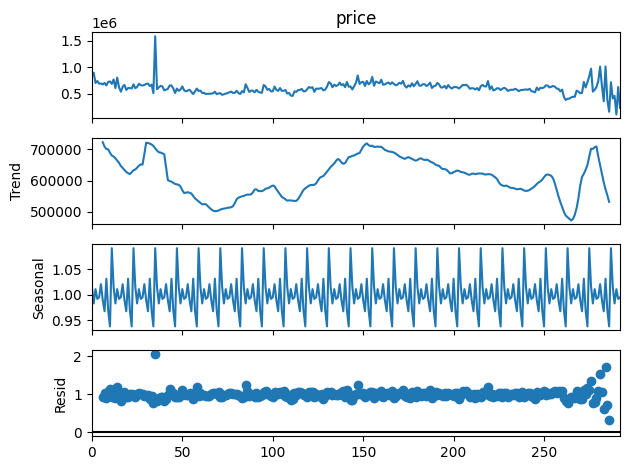

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result_recent = seasonal_decompose(avg_price_per_month_recent['price'], model='multiplicative', period=12)

# Plot the decomposed components
result_recent.plot()
plt.show()

### Specific Questions, Insights, and Observations
### Specific Questions, Insights, and Observations

#### 1. What trends can be observed in house prices over time?

From the time series plot of average house prices from 2000 onwards:

- **Initial Spike**: There is an initial spike around 2000-2004. This could be due to outlier transactions or market conditions that need further investigation.
- **General Trend**: Post-2004, house prices show a general decrease until around 2012.
- **Recovery and Stabilization**: From 2012 to 2020, there is a gradual increase and stabilization in house prices.
- **Recent Volatility**: There is noticeable volatility and some spikes in prices around 2022-2024, likely influenced by recent market conditions, economic factors, or specific high-value transactions.

#### 2. Are there any significant outliers in historical house prices?

From the residual plot in the time series decomposition:

- **Significant Outliers**: There are a few significant outliers, particularly around the initial spike in the early 2000s and some points towards the recent years.
- **Influence on Analysis**: These outliers can have a substantial influence on the average price trends and might need to be investigated or mitigated to ensure a robust analysis.

#### 3. What seasonal patterns can be observed in house prices?

From the seasonal component of the time series decomposition:

- **Regular Seasonal Pattern**: There is a clear seasonal pattern in house prices, indicating regular fluctuations within each year.
- **Amplitude**: The amplitude of these seasonal fluctuations appears consistent, suggesting regular cyclical variations in house prices, possibly driven by seasonal demand, economic cycles, or other factors.

#### 4. How does the trend component explain the changes in house prices?

From the trend component of the time series decomposition:

- **Initial Decrease**: The trend shows an initial decrease in house prices from 2000 to around 2012.
- **Subsequent Increase**: After 2012, there is a gradual increase in the trend component, indicating a recovery in house prices.
- **Recent Trends**: The trend component shows some volatility in recent years, reflecting current market conditions and economic factors affecting house prices.
